In [111]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.preprocessing import MinMaxScaler
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('AttributionModelData.csv')
df.head()

,ga:campaign,ga:sourceMedium,ga:deviceCategory,ga:city,ga:dimension1,ga:dimension2,ga:dateHour,ga:goal2Completions,ga:goal3Completions,ga:goal4Completions
0,(not set),dcc.godaddy.com / referral,desktop,Tuttlingen,GA1877854148.1587670163,1590696642396.icqti86h,2020052809,0,0,0
1,(not set),dcc.godaddy.com / referral,desktop,Tuttlingen,GA1877854148.1587670163,1590696642396.icqti86h,2020052810,0,0,0
2,(not set),dcc.godaddy.com / referral,desktop,Tuttlingen,GA1877854148.1587670163,1590696642396.icqti86h,2020052811,0,0,0
3,(not set),(direct) / (none),desktop,Calgary,GA245311387.1590694339,1590694340902.y9xcbvd,2020052812,0,0,0
4,(not set),(direct) / (none),desktop,Cobourg,GA399408962.1477406861,1590695213674.9e5rmnh6,2020052812,0,0,0


In [3]:
df

,ga:campaign,ga:sourceMedium,ga:deviceCategory,ga:city,ga:dimension1,ga:dimension2,ga:dateHour,ga:goal2Completions,ga:goal3Completions,ga:goal4Completions
0,(not set),dcc.godaddy.com / referral,desktop,Tuttlingen,GA1877854148.1587670163,1590696642396.icqti86h,2020052809,0,0,0
1,(not set),dcc.godaddy.com / referral,desktop,Tuttlingen,GA1877854148.1587670163,1590696642396.icqti86h,2020052810,0,0,0
2,(not set),dcc.godaddy.com / referral,desktop,Tuttlingen,GA1877854148.1587670163,1590696642396.icqti86h,2020052811,0,0,0
3,(not set),(direct) / (none),desktop,Calgary,GA245311387.1590694339,1590694340902.y9xcbvd,2020052812,0,0,0
4,(not set),(direct) / (none),desktop,Cobourg,GA399408962.1477406861,1590695213674.9e5rmnh6,2020052812,0,0,0
5,(not set),(direct) / (none),desktop,Nakano City,GA1698933044.1590694131,1590694131136.mpuxa96,2020052812,0,0,0
6,(not set),(direct) / (none),desktop,Quebec City,GA438874130.1590694634,1590694696196.62rwcyl,2020052812,0,0,0
7,(not set),(direct) / (none),mobile,(not set),GA390665050.1590695654,1590695652879.38tswibn,2020052812,0,0,0
8,(not set),(direct) / (none),mobile,Edmonton,GA1406292255.1590694355,1590694356536.8my05vfu,2020052812,0,0,0
9,(not set),(direct) / (none),mobile,Lower Sackville,GA362431816.1590693304,1590695647541.dro0w23w,2020052812,0,0,0


In [4]:
df.nunique()

ga:campaign               15
ga:sourceMedium           77
ga:deviceCategory          3
ga:city                  986
ga:dimension1          24382
ga:dimension2          31209
ga:dateHour              543
ga:goal2Completions        2
ga:goal3Completions        2
ga:goal4Completions        2
dtype: int64

In [5]:
df['ga:campaign'].unique()

array(['(not set)',
       'Brand Awareness and Reach-Make Life Indoors-Display Ads',
       'Display ADS - RE + Custom AU', 'Dynamic Search Ads-Shoes',
       'Search Ads-Summer-Shoes', 'Smart Display Ads',
       'Shoes Sale-Display Ads', 'Display Ads for Mens', 'jimmy',
       'AppFutura', 'Life Indoors 1', 'Father Day Shoe Sale',
       'Winter Boots - Search Ads + Keywords', 'Shoes Sale-Search Ads',
       'Father day shoes sale-Display ads'], dtype=object)

In [6]:
df['ga:campaign'].nunique()

15

In [7]:
df.shape

(32942, 10)

In [8]:
df1 = df[df['ga:campaign'] != '(not set)']

In [9]:
df1.shape

(9927, 10)

In [10]:
cost_data = pd.read_csv('adscost.csv')
cost_data.head()

,ga:campaign,ga:adCost,ga:costPerConversion
0,(not set),0.000000,0.000000
1,AppFutura,0.000000,0.000000
2,Black Friday Sale-Display ADS,897.047138,4.797044
3,Black Friday- Search ADS,530.495086,0.678382
4,Brand Awareness and Reach-Make Life Indoors-Di...,456.261924,7.479704


In [11]:
cost_data['ga:campaign'].nunique()

19

In [12]:
cost_data1 = cost_data[cost_data['ga:campaign'] != '(not set)']

cost_data1

,ga:campaign,ga:adCost,ga:costPerConversion
1,AppFutura,0.000000,0.000000
2,Black Friday Sale-Display ADS,897.047138,4.797044
3,Black Friday- Search ADS,530.495086,0.678382
4,Brand Awareness and Reach-Make Life Indoors-Di...,456.261924,7.479704
5,Display ADS - RE + Custom AU,5141.931260,3.053403
6,Display Ads for Mens,631.327908,9.422805
7,Dynamic Search Ads-Shoes,1924.059622,0.547697
8,Father Day Shoe Sale,691.173270,1.076594
9,Father day shoes sale-Display ads,504.445855,8.007077
10,Life Indoors 1,502.420809,2.137961


In [13]:
df2 = pd.merge(df1,cost_data1, on = 'ga:campaign')
df2.head()

,ga:campaign,ga:sourceMedium,ga:deviceCategory,ga:city,ga:dimension1,ga:dimension2,ga:dateHour,ga:goal2Completions,ga:goal3Completions,ga:goal4Completions,ga:adCost,ga:costPerConversion
0,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,desktop,Barrie,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,0,0,0,456.261924,7.479704
1,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,desktop,Toronto,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,0,0,0,456.261924,7.479704
2,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,0,0,0,456.261924,7.479704
3,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Guelph,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,0,0,0,456.261924,7.479704
4,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,0,0,0,456.261924,7.479704


In [14]:
df2.nunique()

ga:campaign               14
ga:sourceMedium            3
ga:deviceCategory          3
ga:city                  636
ga:dimension1           7228
ga:dimension2           9492
ga:dateHour              511
ga:goal2Completions        2
ga:goal3Completions        2
ga:goal4Completions        2
ga:adCost                 13
ga:costPerConversion      13
dtype: int64

In [15]:
df2.shape

(9927, 12)

In [16]:
df2.columns = ['CampaignName', 'Source/Medium' , 'device' , 'city' , 'clientID', 'sessionID', 'dateHour', 'conversion_1', 'conversion_2', 'conversion_3', 'Cost', 'cpc']
df2.nunique()

CampaignName       14
Source/Medium       3
device              3
city              636
clientID         7228
sessionID        9492
dateHour          511
conversion_1        2
conversion_2        2
conversion_3        2
Cost               13
cpc                13
dtype: int64

In [17]:
df2.CampaignName.nunique()

14

In [18]:
df1['ga:campaign'].nunique()

14

In [19]:
df2.CampaignName.value_counts()

Father day shoes sale-Display ads                          3751
Dynamic Search Ads-Shoes                                   3122
Father Day Shoe Sale                                       1962
Search Ads-Summer-Shoes                                     560
Brand Awareness and Reach-Make Life Indoors-Display Ads     203
Display ADS - RE + Custom AU                                191
Shoes Sale-Display Ads                                       97
jimmy                                                        18
Display Ads for Mens                                          9
Smart Display Ads                                             6
Life Indoors 1                                                4
AppFutura                                                     2
Winter Boots - Search Ads + Keywords                          1
Shoes Sale-Search Ads                                         1
Name: CampaignName, dtype: int64

In [20]:
df2.columns

Index(['CampaignName', 'Source/Medium', 'device', 'city', 'clientID',
       'sessionID', 'dateHour', 'conversion_1', 'conversion_2', 'conversion_3',
       'Cost', 'cpc'],
      dtype='object')

In [21]:
df2[['Source','Medium']] = df2['Source/Medium'].str.split("/",expand=True) 
df2.head()

,CampaignName,Source/Medium,device,city,clientID,sessionID,dateHour,conversion_1,conversion_2,conversion_3,Cost,cpc,Source,Medium
0,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,desktop,Barrie,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,0,0,0,456.261924,7.479704,google,cpc
1,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,desktop,Toronto,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,0,0,0,456.261924,7.479704,google,cpc
2,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,0,0,0,456.261924,7.479704,google,cpc
3,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Guelph,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,0,0,0,456.261924,7.479704,google,cpc
4,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,0,0,0,456.261924,7.479704,google,cpc


In [22]:
df2.Source.value_counts()

google                   9907
VisualsoftAffiliates       18
AppFutura                   2
Name: Source, dtype: int64

In [23]:
df2.Medium.value_counts()

 cpc          9907
 affiliate      18
 Link            2
Name: Medium, dtype: int64

In [24]:
# Since almost all are from Google / cpc, no use 

In [25]:
df2['Source/Medium'].value_counts()

google / cpc                        9907
VisualsoftAffiliates / affiliate      18
AppFutura / Link                       2
Name: Source/Medium, dtype: int64

In [26]:
df2['Source/Medium'].unique()

array(['google / cpc', 'VisualsoftAffiliates / affiliate',
       'AppFutura / Link'], dtype=object)

In [27]:
df['ga:sourceMedium'].value_counts()

google / cpc                                                   9911
google / organic                                               9728
(direct) / (none)                                              4823
facebook.com / referral                                        3722
m.facebook.com / referral                                      2191
bing / organic                                                 1033
instagram.com / referral                                        310
yahoo / organic                                                 276
l.facebook.com / referral                                       167
ca.search.yahoo.com / referral                                  129
mailchi.mp / referral                                           117
rieker.com / referral                                           103
lm.facebook.com / referral                                       87
duckduckgo / organic                                             52
dcc.godaddy.com / referral                      

In [28]:
df['ga:sourceMedium'].str.split("/",expand=True)  

,0,1
0,dcc.godaddy.com,referral
1,dcc.godaddy.com,referral
2,dcc.godaddy.com,referral
3,(direct),(none)
4,(direct),(none)
5,(direct),(none)
6,(direct),(none)
7,(direct),(none)
8,(direct),(none)
9,(direct),(none)


In [29]:
## all these comes under (not set), so we remove this

In [30]:
df2.head()

,CampaignName,Source/Medium,device,city,clientID,sessionID,dateHour,conversion_1,conversion_2,conversion_3,Cost,cpc,Source,Medium
0,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,desktop,Barrie,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,0,0,0,456.261924,7.479704,google,cpc
1,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,desktop,Toronto,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,0,0,0,456.261924,7.479704,google,cpc
2,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,0,0,0,456.261924,7.479704,google,cpc
3,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Guelph,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,0,0,0,456.261924,7.479704,google,cpc
4,Brand Awareness and Reach-Make Life Indoors-Di...,google / cpc,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,0,0,0,456.261924,7.479704,google,cpc


In [31]:
df3 = df2.drop(columns=['Source/Medium', 'Source', 'Medium'])

In [32]:
df3.head()

,CampaignName,device,city,clientID,sessionID,dateHour,conversion_1,conversion_2,conversion_3,Cost,cpc
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Barrie,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,0,0,0,456.261924,7.479704
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Toronto,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,0,0,0,456.261924,7.479704
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,0,0,0,456.261924,7.479704
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Guelph,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,0,0,0,456.261924,7.479704
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,0,0,0,456.261924,7.479704


In [33]:
df3.clientID.nunique()

7228

In [34]:
df3.sessionID.nunique()

9492

In [35]:
df3.conversion_1.value_counts()

0    9516
1     411
Name: conversion_1, dtype: int64

In [36]:
df3.conversion_2.value_counts()

0    9733
1     194
Name: conversion_2, dtype: int64

In [37]:
df3.conversion_3.value_counts()

0    9797
1     130
Name: conversion_3, dtype: int64

### 

In [38]:
df3.city.nunique()

636

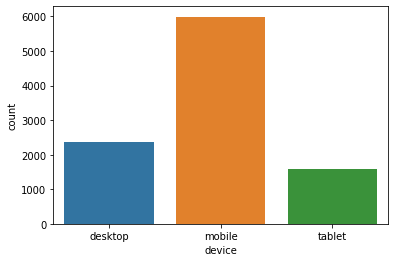

In [39]:
import seaborn as sns
ax = sns.countplot(x="device", data=df3)

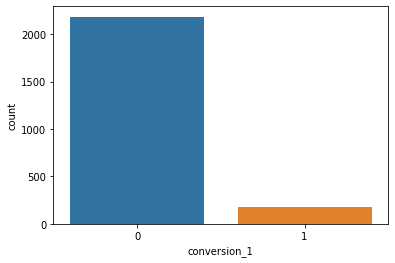

In [40]:
sns.countplot(x="conversion_1", data=df3[df3.device=='desktop'])

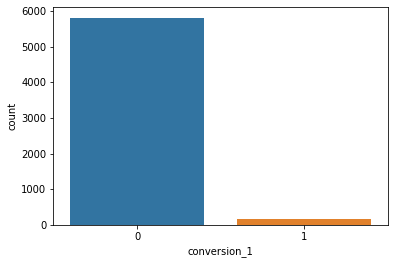

In [41]:
sns.countplot(x="conversion_1", data=df3[df3.device=='mobile'])

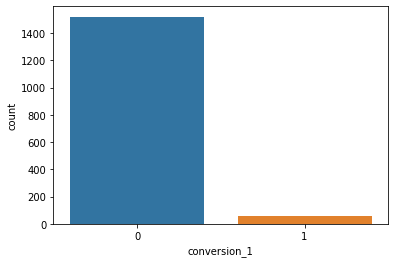

In [42]:
sns.countplot(x="conversion_1", data=df3[df3.device=='tablet'])

In [43]:
df3_devicegrp = df3.groupby('device')

def return_per(device):
    temp = df3_devicegrp.get_group(device)
    pos = temp[temp['conversion_1'] == 1].shape[0]
    ret = pos/temp.shape[0]
    print(device, ": ",ret)

all_devices = df3.device.unique()
for i in all_devices:
    return_per(i)
    

desktop :  0.075
mobile :  0.029706275033377836
tablet :  0.035555555555555556


## Dekstop users have higher Conv. rate

In [44]:
df3

,CampaignName,device,city,clientID,sessionID,dateHour,conversion_1,conversion_2,conversion_3,Cost,cpc
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Barrie,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,0,0,0,456.261924,7.479704
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Toronto,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,0,0,0,456.261924,7.479704
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,0,0,0,456.261924,7.479704
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Guelph,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,0,0,0,456.261924,7.479704
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,0,0,0,456.261924,7.479704
5,Brand Awareness and Reach-Make Life Indoors-Di...,tablet,Peterborough,GA2008055013.1590697296,1590697305027.sqxndpub,2020052813,0,0,0,456.261924,7.479704
6,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Windsor,GA1636674983.1590700675,1590700835601.0bxg9vbn,2020052814,0,0,0,456.261924,7.479704
7,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Guelph,GA612916535.1590698366,1590702005166.2d7w2uke,2020052814,0,0,0,456.261924,7.479704
8,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Kingston,GA1797768913.1590700159,1590700348707.s47381qu,2020052814,1,0,0,456.261924,7.479704
9,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Montreal,GA735772444.1590703424,1590703438282.p1unh3ns,2020052815,0,0,0,456.261924,7.479704


In [45]:
df3['conversion'] = df3[["conversion_1", "conversion_2","conversion_3"]].sum(axis=1)

In [46]:
df3['conversion'].value_counts()

0    9483
1     258
3     105
2      81
Name: conversion, dtype: int64

In [47]:
df3.head()

,CampaignName,device,city,clientID,sessionID,dateHour,conversion_1,conversion_2,conversion_3,Cost,cpc,conversion
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Barrie,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,0,0,0,456.261924,7.479704,0
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,Toronto,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,0,0,0,456.261924,7.479704,0
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,0,0,0,456.261924,7.479704,0
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Guelph,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,0,0,0,456.261924,7.479704,0
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,Ottawa,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,0,0,0,456.261924,7.479704,0


In [48]:
df4 = df3.drop(columns=['city', 'conversion_1', 'conversion_2', 'conversion_3'])

In [49]:
df4

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0
5,Brand Awareness and Reach-Make Life Indoors-Di...,tablet,GA2008055013.1590697296,1590697305027.sqxndpub,2020052813,456.261924,7.479704,0
6,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA1636674983.1590700675,1590700835601.0bxg9vbn,2020052814,456.261924,7.479704,0
7,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590702005166.2d7w2uke,2020052814,456.261924,7.479704,0
8,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1797768913.1590700159,1590700348707.s47381qu,2020052814,456.261924,7.479704,1
9,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA735772444.1590703424,1590703438282.p1unh3ns,2020052815,456.261924,7.479704,0


In [50]:
def add_derived_columns(df):
    df_ext = df.copy()
    df_ext['jid'] = df_ext['clientID'].map(str) + '_' + df_ext['sessionID'].map(str)

    return df_ext

In [51]:
df5 = add_derived_columns(df4)
df5.head()

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion,jid
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0,GA164411971.1590695702_1590695703234.b62crxdt
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0,GA313962449.1590693786_1590693787482.itvr4ea5
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0,GA612916535.1590698366_1590698487970.4vvgkp79
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv


In [52]:
df5['CampaignName'].nunique()

14

In [53]:
def sample_campaigns(df, n_campaigns):    
    campaigns = np.random.choice( df['CampaignName'].unique(), n_campaigns, replace = False )
    return df[ df['CampaignName'].isin(campaigns) ]

n_campaigns = df5['CampaignName'].nunique()
df6 = sample_campaigns(df5, n_campaigns)

In [54]:
df6.head()

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion,jid
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0,GA164411971.1590695702_1590695703234.b62crxdt
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0,GA313962449.1590693786_1590693787482.itvr4ea5
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0,GA612916535.1590698366_1590698487970.4vvgkp79
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv


In [55]:
def balance_conversions(df):
    df_minority = df[df.conversion == 1]
    df_majority = df[df.conversion == 0]
    
    df_majority_jids = np.array_split(df_majority['jid'].unique(), 100 * df_majority.shape[0]/df_minority.shape[0] )
    
    df_majority_sampled = pd.DataFrame(data=None, columns=df.columns)
    for jid_chunk in df_majority_jids:
        df_majority_sampled = pd.concat([df_majority_sampled, df_majority[df_majority.jid.isin(jid_chunk)]])
        if df_majority_sampled.shape[0] > df_minority.shape[0]:
            break
    
    return pd.concat([df_majority_sampled, df_minority]).sample(frac=1).reset_index(drop=True)

In [56]:
df7 = balance_conversions(df6)

In [57]:
df7 = df6

In [58]:
df7.shape

(9927, 9)

In [59]:
df7

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion,jid
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0,GA164411971.1590695702_1590695703234.b62crxdt
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0,GA313962449.1590693786_1590693787482.itvr4ea5
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0,GA612916535.1590698366_1590698487970.4vvgkp79
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv
5,Brand Awareness and Reach-Make Life Indoors-Di...,tablet,GA2008055013.1590697296,1590697305027.sqxndpub,2020052813,456.261924,7.479704,0,GA2008055013.1590697296_1590697305027.sqxndpub
6,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA1636674983.1590700675,1590700835601.0bxg9vbn,2020052814,456.261924,7.479704,0,GA1636674983.1590700675_1590700835601.0bxg9vbn
7,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590702005166.2d7w2uke,2020052814,456.261924,7.479704,0,GA612916535.1590698366_1590702005166.2d7w2uke
8,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1797768913.1590700159,1590700348707.s47381qu,2020052814,456.261924,7.479704,1,GA1797768913.1590700159_1590700348707.s47381qu
9,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA735772444.1590703424,1590703438282.p1unh3ns,2020052815,456.261924,7.479704,0,GA735772444.1590703424_1590703438282.p1unh3ns


In [60]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df7[['device']]).toarray())
df7 = df7.join(enc_df)
df7

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion,jid,0,1,2
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0,GA164411971.1590695702_1590695703234.b62crxdt,1.0,0.0,0.0
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0,GA313962449.1590693786_1590693787482.itvr4ea5,1.0,0.0,0.0
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv,0.0,1.0,0.0
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0,GA612916535.1590698366_1590698487970.4vvgkp79,0.0,1.0,0.0
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv,0.0,1.0,0.0
5,Brand Awareness and Reach-Make Life Indoors-Di...,tablet,GA2008055013.1590697296,1590697305027.sqxndpub,2020052813,456.261924,7.479704,0,GA2008055013.1590697296_1590697305027.sqxndpub,0.0,0.0,1.0
6,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA1636674983.1590700675,1590700835601.0bxg9vbn,2020052814,456.261924,7.479704,0,GA1636674983.1590700675_1590700835601.0bxg9vbn,1.0,0.0,0.0
7,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590702005166.2d7w2uke,2020052814,456.261924,7.479704,0,GA612916535.1590698366_1590702005166.2d7w2uke,0.0,1.0,0.0
8,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1797768913.1590700159,1590700348707.s47381qu,2020052814,456.261924,7.479704,1,GA1797768913.1590700159_1590700348707.s47381qu,0.0,1.0,0.0
9,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA735772444.1590703424,1590703438282.p1unh3ns,2020052815,456.261924,7.479704,0,GA735772444.1590703424_1590703438282.p1unh3ns,0.0,1.0,0.0


In [61]:
df7 = df7.rename(columns={0: "desktop", 1: "mobile", 2: "tablet"})
df7

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion,jid,desktop,mobile,tablet
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0,GA164411971.1590695702_1590695703234.b62crxdt,1.0,0.0,0.0
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0,GA313962449.1590693786_1590693787482.itvr4ea5,1.0,0.0,0.0
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv,0.0,1.0,0.0
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0,GA612916535.1590698366_1590698487970.4vvgkp79,0.0,1.0,0.0
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv,0.0,1.0,0.0
5,Brand Awareness and Reach-Make Life Indoors-Di...,tablet,GA2008055013.1590697296,1590697305027.sqxndpub,2020052813,456.261924,7.479704,0,GA2008055013.1590697296_1590697305027.sqxndpub,0.0,0.0,1.0
6,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA1636674983.1590700675,1590700835601.0bxg9vbn,2020052814,456.261924,7.479704,0,GA1636674983.1590700675_1590700835601.0bxg9vbn,1.0,0.0,0.0
7,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590702005166.2d7w2uke,2020052814,456.261924,7.479704,0,GA612916535.1590698366_1590702005166.2d7w2uke,0.0,1.0,0.0
8,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1797768913.1590700159,1590700348707.s47381qu,2020052814,456.261924,7.479704,1,GA1797768913.1590700159_1590700348707.s47381qu,0.0,1.0,0.0
9,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA735772444.1590703424,1590703438282.p1unh3ns,2020052815,456.261924,7.479704,0,GA735772444.1590703424_1590703438282.p1unh3ns,0.0,1.0,0.0


In [62]:
def map_one_hot(df, column_names, result_column_name):
    mapper = {} 
    for i, col_name in enumerate(column_names):
        for val in df[col_name].unique():
            mapper[str(val) + str(i)] = len(mapper)
         
    df_ext = df.copy()
    
    def one_hot(values):
        v = np.zeros( len(mapper) )
        for i, val in enumerate(values): 
            v[ mapper[str(val) + str(i)] ] = 1
        return v    
    
    df_ext[result_column_name] = df_ext[column_names].values.tolist()
    df_ext[result_column_name] = df_ext[result_column_name].map(one_hot)
    
    return df_ext

In [63]:
df8 = map_one_hot(df7, ['desktop', 'mobile', 'tablet'], 'cats')
print(df8.shape)

df9 = map_one_hot(df8, ['CampaignName'], 'campaigns')
print(df9.shape)

(9927, 13)
(9927, 14)


In [64]:
df9.head()

,CampaignName,device,clientID,sessionID,dateHour,Cost,cpc,conversion,jid,desktop,mobile,tablet,cats,campaigns
0,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA164411971.1590695702,1590695703234.b62crxdt,2020052812,456.261924,7.479704,0,GA164411971.1590695702_1590695703234.b62crxdt,1.0,0.0,0.0,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Brand Awareness and Reach-Make Life Indoors-Di...,desktop,GA313962449.1590693786,1590693787482.itvr4ea5,2020052812,456.261924,7.479704,0,GA313962449.1590693786_1590693787482.itvr4ea5,1.0,0.0,0.0,"[1.0, 0.0, 1.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052812,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv,0.0,1.0,0.0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA612916535.1590698366,1590698487970.4vvgkp79,2020052813,456.261924,7.479704,0,GA612916535.1590698366_1590698487970.4vvgkp79,0.0,1.0,0.0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Brand Awareness and Reach-Make Life Indoors-Di...,mobile,GA1741536312.1590695945,1590696054954.ozm77dxv,2020052813,456.261924,7.479704,0,GA1741536312.1590695945_1590696054954.ozm77dxv,0.0,1.0,0.0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Last Touch Attribution

### Calculating LTA their way

In [77]:
def last_touch_attribution(df):
    
    def count_by_campaign(df):
        counters = np.zeros(n_campaigns)
        for campaign_one_hot in df['campaigns'].values:
            campaign_id = np.argmax(campaign_one_hot)
            counters[campaign_id] = counters[campaign_id] + 1
        return counters
        
    campaign_impressions = count_by_campaign(df)
    
    df_converted = df[df['conversion'] == 1]
    idx = df_converted.groupby(['jid'])['dateHour'].transform(max) == df_converted['dateHour']
    campaign_conversions = count_by_campaign(df_converted[idx])
        
    return campaign_conversions / campaign_impressions
    
lta = last_touch_attribution(df9)

In [78]:
lta

array([0.00985222, 0.0052356 , 0.04932735, 0.01071429, 0.        ,
       0.02061856, 0.        , 0.11111111, 0.        , 0.        ,
       0.04077472, 0.        , 0.        , 0.00266596])

In [84]:
len(lta)

14

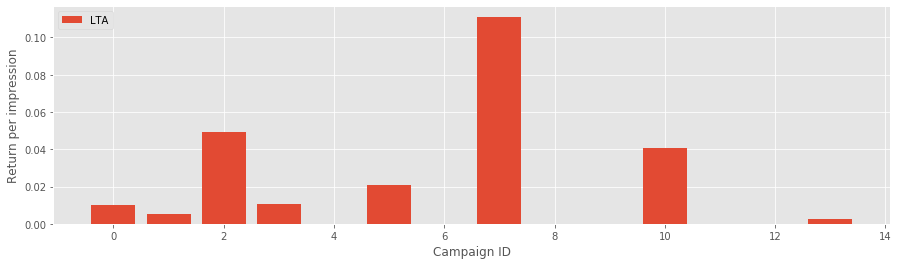

In [112]:
# Visualization of the attribution scores

campaign_idx = range(0, n_campaigns)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
plt.bar( range(len(lta[campaign_idx])), lta[campaign_idx], label='LTA' )
plt.xlabel('Campaign ID')
plt.ylabel('Return per impression')
plt.legend(loc='upper left')
plt.show()

### Calculating LTA My way

In [89]:
df_lta = pd.read_csv('click_impression_aggr.csv')
df_lta.columns = ['CampaignName','Impressions','conversion']
df_lta

,CampaignName,Impressions,conversion
0,Black Friday Sale-Display ADS,695198,4630
1,Black Friday- Search ADS,126758,1633
2,Brand Awareness and Reach-Make Life Indoors-Di...,1007802,634
3,Display ADS - RE + Custom AU,7866813,49703
4,Display Ads for Mens,1198641,6306
5,Dynamic Search Ads-Shoes,18938,4882
6,Father Day Shoe Sale,20009,1748
7,Father day shoes sale-Display ads,776821,5887
8,Life Indoors 1,120382,1948
9,Search Ads-Summer-Shoes,193292,5812


In [90]:
df_lta.CampaignName.unique()

array(['Black Friday Sale-Display ADS', 'Black Friday- Search ADS',
       'Brand Awareness and Reach-Make Life Indoors-Display Ads',
       'Display ADS - RE + Custom AU', 'Display Ads for Mens',
       'Dynamic Search Ads-Shoes', 'Father Day Shoe Sale',
       'Father day shoes sale-Display ads', 'Life Indoors 1',
       'Search Ads-Summer-Shoes', 'Shoes Sale-Display Ads',
       'Shoes Sale-Search Ads', 'Smart Display Ads',
       'Tall Boot Display - RE + Custom AU', 'Winter Boot- Search Ads',
       'Winter Boots - Search Ads + Keywords'], dtype=object)

In [91]:
df9.CampaignName.unique()

array(['Brand Awareness and Reach-Make Life Indoors-Display Ads',
       'Display ADS - RE + Custom AU', 'Dynamic Search Ads-Shoes',
       'Search Ads-Summer-Shoes', 'Smart Display Ads',
       'Shoes Sale-Display Ads', 'Display Ads for Mens', 'jimmy',
       'AppFutura', 'Life Indoors 1', 'Father Day Shoe Sale',
       'Winter Boots - Search Ads + Keywords', 'Shoes Sale-Search Ads',
       'Father day shoes sale-Display ads'], dtype=object)

In [92]:
df9['CampaignName'].isin(['Father day shoes sale-Display ads']).any()

True

In [96]:
df_lta_gp = df_lta.groupby('CampaignName')
def last_touch_attribution(temp):    
    testing_imp = pd.DataFrame(temp.Impressions.value_counts().rename_axis('Value').reset_index(name='Impression_count'))
    testing_imp['Total_Impressions']=testing_imp['Value']*testing_imp['Impression_count']
    Tot_impressions=sum(testing_imp['Total_Impressions'])

    testing_conv = pd.DataFrame(temp.conversion.value_counts().rename_axis('Value').reset_index(name='conversion_count'))
    Tot_convs = sum(testing_conv['Value']*testing_conv['conversion_count'])

    LTA = (Tot_convs ) / (Tot_impressions)
    return LTA
n_campaigns2 = 0
campaigns_lta = {}
all_campaigns = df9['CampaignName'].unique()
for i in all_campaigns:
    if(df_lta['CampaignName'].isin([i]).any()):
        campaigns_lta[i] = last_touch_attribution(df_lta_gp.get_group(i))
        n_campaigns2 = n_campaigns2 +1
    else:
        print("Not there:", i)
print(n_campaigns2)

Not there: jimmy
Not there: AppFutura
12


In [97]:
campaigns_lta

{'Brand Awareness and Reach-Make Life Indoors-Display Ads': 0.0006290918255768494,
 'Display ADS - RE + Custom AU': 0.006318060439468943,
 'Dynamic Search Ads-Shoes': 0.2577885732389904,
 'Search Ads-Summer-Shoes': 0.03006849740289303,
 'Smart Display Ads': 0.008376840716746901,
 'Shoes Sale-Display Ads': 0.006860014322970121,
 'Display Ads for Mens': 0.005260958034974609,
 'Life Indoors 1': 0.01618182120250536,
 'Father Day Shoe Sale': 0.08736068769053926,
 'Winter Boots - Search Ads + Keywords': 0.030231058935296713,
 'Shoes Sale-Search Ads': 0.026141748685101288,
 'Father day shoes sale-Display ads': 0.007578322419193096}

In [98]:
ltaa = np.array(list(campaigns_lta.values()))

ltaa = np.array(ltaa)

In [99]:
ltaa , lta

(array([0.00062909, 0.00631806, 0.25778857, 0.0300685 , 0.00837684,
        0.00686001, 0.00526096, 0.01618182, 0.08736069, 0.03023106,
        0.02614175, 0.00757832]),
 array([0.00985222, 0.0052356 , 0.04932735, 0.01071429, 0.        ,
        0.02061856, 0.        , 0.11111111, 0.        , 0.        ,
        0.04077472, 0.        , 0.        , 0.00266596]))

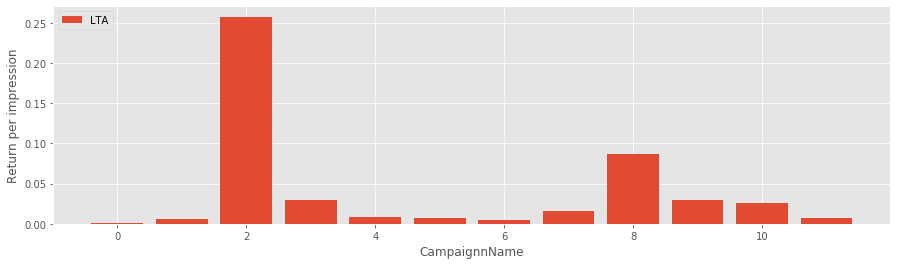

In [113]:
# Visualization of the attribution scores

campaign_idx = range(0, n_campaigns2)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
plt.bar( range(len(ltaa[campaign_idx])), ltaa[campaign_idx], label='LTA' )
plt.xlabel('CampaignnName')
plt.ylabel('Return per impression')
plt.legend(loc='upper left')
plt.show()

# Logistic Regression

In [102]:
def features_for_logistic_regression(df):

    def pairwise_max(series):
        return np.max(series.tolist(), axis = 0).tolist()
    
    aggregation = {
        'campaigns': pairwise_max,
        'cats': pairwise_max,
        'Cost': 'sum',
        'conversion': 'max'
    }
    
    df_agg = df.groupby(['jid']).agg(aggregation)
    
    df_agg['features'] = df_agg[['campaigns', 'cats', 'Cost']].values.tolist()
    
    return (
        np.stack(df_agg['features'].map(lambda x: np.hstack(x)).values),
        df_agg['conversion'].values
    )

x, y = features_for_logistic_regression(df9)
print(np.shape(x))

(9492, 21)


In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.40, random_state = 1)

In [104]:
# Quick sanity check
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9562812746905451


/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mohitbagaria/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [105]:
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.constraints import NonNeg

m = np.shape(x)[1]
    
model = Sequential()  
model.add(Dense(1, input_dim=m, activation='sigmoid', name = 'contributions')) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val)) 
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Using TensorFlow backend.


Train on 3417 samples, validate on 2278 samples
Epoch 1/10
3417/3417 [==============================] - 0s 36us/step - loss: 274.5699 - accuracy: 0.0249 - val_loss: 249.5515 - val_accuracy: 0.0250
Epoch 2/10
3417/3417 [==============================] - 0s 10us/step - loss: 239.5037 - accuracy: 0.0249 - val_loss: 217.4831 - val_accuracy: 0.0250
Epoch 3/10
3417/3417 [==============================] - 0s 9us/step - loss: 206.6662 - accuracy: 0.0249 - val_loss: 185.2261 - val_accuracy: 0.0259
Epoch 4/10
3417/3417 [==============================] - 0s 9us/step - loss: 173.8701 - accuracy: 0.0249 - val_loss: 153.1121 - val_accuracy: 0.0259
Epoch 5/10
3417/3417 [==============================] - 0s 8us/step - loss: 140.6475 - accuracy: 0.0249 - val_loss: 120.8082 - val_accuracy: 0.0259
Epoch 6/10
3417/3417 [==============================] - 0s 8us/step - loss: 108.1526 - accuracy: 0.0252 - val_loss: 88.8650 - val_accuracy: 0.0259
Epoch 7/10
3417/3417 [==============================] - 0s 8us/

In [106]:
campaign_idx = range(0, n_campaigns)

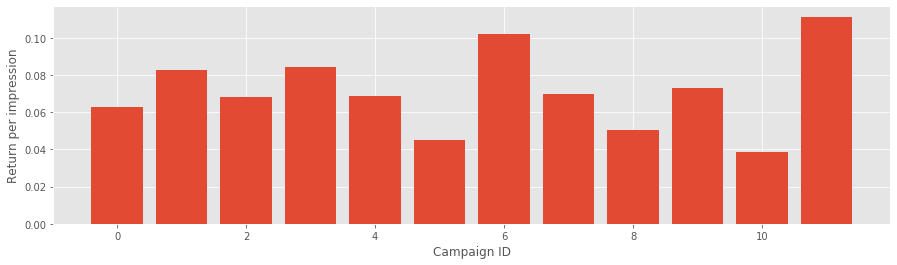

In [114]:
# Visualization of the attribution scores
from sklearn.utils.extmath import softmax

keras_logreg = model.get_layer('contributions').get_weights()[0].flatten()[0:n_campaigns]
keras_logreg = softmax([keras_logreg]).flatten()

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
plt.bar(range(len(keras_logreg[campaign_idx])), keras_logreg[campaign_idx] )
plt.xlabel('Campaign ID')
plt.ylabel('Return per impression')
plt.show()

In [115]:
keras_logreg

array([0.06293298, 0.08287929, 0.06834158, 0.08414776, 0.06853469,
       0.04523838, 0.10182764, 0.06979654, 0.05027263, 0.07288138,
       0.03855348, 0.111332  , 0.06262553, 0.08063616], dtype=float32)

In [109]:
# Key assumption: If one of the campaigns in a journey runs out of budget, 
# then the conversion reward is fully lost for the entire journey
# including both past and future campaigns
def get_campaign_id(x_journey_step):
    return np.argmax(x_journey_step[0:n_campaigns])

def simulate_budget_roi(df, budget_total, attribution, verbose=False):
    budgets = np.ceil(attribution * (budget_total / np.sum(attribution)))
    
    if(verbose):
        print(budgets)
    
    blacklist = set()
    conversions = set()
    for i in range(df.shape[0]):
        campaign_id = get_campaign_id(df.loc[i]['CampaignName']) 
        jid = df.loc[i]['jid']
        if jid not in blacklist:
            if budgets[campaign_id] >= 1:
                budgets[campaign_id] = budgets[campaign_id] - 1
                if(df.loc[i]['conversion'] == 1):
                    conversions.add(jid)
            else:
                blacklist.add(jid)
        
        if(verbose):
            if(i % 10000 == 0):
                print('{:.2%} : {:.2%} budget spent'.format(i/df.shape[0], 1.0 - np.sum(budgets)/budget_total ))
        
        if(np.sum(budgets) < budget_total * 0.02):
            break
            
    return len(conversions.difference(blacklist))

In [110]:
pitches = [0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
attributions = [lta,ltaa,keras_logreg]

for i, pitch in enumerate(pitches):
    for j, attribution in enumerate(attributions):
        reward = simulate_budget_roi(df9, 10000, attribution**pitch)
        print('{} {} : {}'.format(pitch, j, reward))

0.1 0 : 50
0.1 1 : 9
0.1 2 : 14
0.25 0 : 42
0.25 1 : 3
0.25 2 : 14
0.5 0 : 21
0.5 1 : 1
0.5 2 : 11
1.0 0 : 3
1.0 1 : 1
1.0 2 : 10
1.5 0 : 1
1.5 1 : 0
1.5 2 : 8
2.0 0 : 1
2.0 1 : 0
2.0 2 : 5
2.5 0 : 1
2.5 1 : 0
2.5 2 : 5
3.0 0 : 0
3.0 1 : 0
3.0 2 : 3


# Basic LSTM

In [124]:
df9['dateHour'] = df9['dateHour'].astype(int)

In [125]:
def features_for_lstm(df, max_touchpoints):
    
    df_proj = df[['jid', 'campaigns', 'cats', 'Cost', 'dateHour', 'conversion']]
    
    x2d = df_proj.values
    
    x3d_list = np.split(x2d[:, 1:], np.cumsum(np.unique(x2d[:, 0], return_counts=True)[1])[:-1])
    
    x3d = []
    y = []
    for xi in x3d_list:
        journey_matrix = np.apply_along_axis(np.hstack, 1, xi)
        journey_matrix = journey_matrix[ journey_matrix[:, 5].argsort() ] # sort impressions by timestamp
        n_touchpoints = len(journey_matrix)
        padded_journey = []
        if(n_touchpoints >= max_touchpoints):
            padded_journey = journey_matrix[0:max_touchpoints]
        else:
            padded_journey = np.pad(journey_matrix, ((0, max_touchpoints - n_touchpoints), (0, 0)), 'constant', constant_values=(0))
            
        x3d.append(padded_journey[:, 0:-1])
        y.append(np.max(padded_journey[:, -1]))
        
    return np.stack(x3d), y

x, y = features_for_lstm(df9, max_touchpoints = 15)
print(np.shape(x))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 1)

(9492, 15, 22)


In [118]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM

n_steps, n_features = np.shape(x)[1:3]
    
model = Sequential() 
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, input_shape=(n_steps, n_features)))
model.add(Dense(1, activation='sigmoid')) 

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(x_val, y_val)) 
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 6074 samples, validate on 1519 samples
Epoch 1/5
6074/6074 [==============================] - 1s 211us/step - loss: 0.2990 - accuracy: 0.9463 - val_loss: 0.3433 - val_accuracy: 0.9440
Epoch 2/5
6074/6074 [==============================] - 1s 133us/step - loss: 0.2690 - accuracy: 0.9547 - val_loss: 0.3335 - val_accuracy: 0.9440
Epoch 3/5
6074/6074 [==============================] - 1s 134us/step - loss: 0.2690 - accuracy: 0.9547 - val_loss: 0.3375 - val_accuracy: 0.9440
Epoch 4/5
6074/6074 [==============================] - 1s 133us/step - loss: 0.2711 - accuracy: 0.9547 - val_loss: 0.3321 - val_accuracy: 0.9440
Epoch 5/5
6074/6074 [==============================] - 1s 130us/step - loss: 0.2700 - accuracy: 0.9547 - val_loss: 0.3351 - val_accuracy: 0.9440
Test score: 0.23986340350637692
Test accuracy: 0.9557662010192871


# LSTM with Attention

In [119]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Input, Lambda, RepeatVector, Permute, Flatten, Activation, Multiply
from keras.constraints import NonNeg
from keras import backend as K
from keras.models import Model

n_steps, n_features = np.shape(x)[1:3]

hidden_units = 64

main_input = Input(shape=(n_steps, n_features))
    
embeddings = Dense(128, activation='linear', input_shape=(n_steps, n_features))(main_input)

activations = LSTM(hidden_units, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(embeddings)

attention = Dense(1, activation='tanh')(activations)
attention = Flatten()(attention)
attention = Activation('softmax', name = 'attention_weigths')(attention)
attention = RepeatVector(hidden_units * 1)(attention)
attention = Permute([2, 1])(attention)

weighted_activations = Multiply()([activations, attention])
weighted_activations = Lambda(lambda xin: K.sum(xin, axis=-2), output_shape=(hidden_units,))(weighted_activations)

main_output = Dense(1, activation='sigmoid')(weighted_activations)

model = Model(inputs=main_input, outputs=main_output)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=64, epochs=5, verbose=1, validation_data=(x_val, y_val)) 
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Train on 6074 samples, validate on 1519 samples
Epoch 1/5
6074/6074 [==============================] - 2s 296us/step - loss: 0.2923 - accuracy: 0.9397 - val_loss: 0.3273 - val_accuracy: 0.9440
Epoch 2/5
6074/6074 [==============================] - 1s 193us/step - loss: 0.2736 - accuracy: 0.9547 - val_loss: 0.3350 - val_accuracy: 0.9440
Epoch 3/5
6074/6074 [==============================] - 1s 191us/step - loss: 0.2709 - accuracy: 0.9547 - val_loss: 0.3250 - val_accuracy: 0.9440
Epoch 4/5
6074/6074 [==============================] - 1s 190us/step - loss: 0.2709 - accuracy: 0.9547 - val_loss: 0.3254 - val_accuracy: 0.9440
Epoch 5/5
6074/6074 [==============================] - 1s 182us/step - loss: 0.2700 - accuracy: 0.9547 - val_loss: 0.3308 - val_accuracy: 0.9440
Test score: 0.2391699680282669
Test accuracy: 0.9557662010192871


## Analysis of LSTM-A Model

In [120]:
def get_campaign_id(x_journey_step):
    return np.argmax(x_journey_step[0:n_campaigns])

attention_model = Model(inputs=model.input, outputs=model.get_layer('attention_weigths').output)

a = attention_model.predict(x_train)

attributions = np.zeros(n_campaigns)
campaign_freq = np.ones(n_campaigns)
for i, journey in enumerate(a):
    for step, step_contribution in enumerate(journey):
        if(np.sum(x_train[i][step]) > 0):
            campaign_id = get_campaign_id(x_train[i][step])
            attributions[campaign_id] = attributions[campaign_id] + step_contribution
            campaign_freq[campaign_id] = campaign_freq[campaign_id] + 1

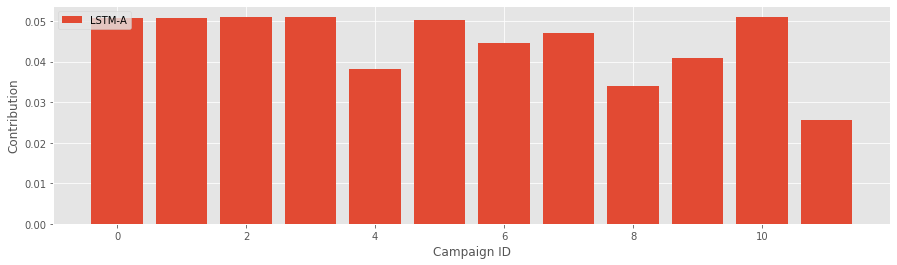

In [127]:
lstm_a = (attributions/campaign_freq)

fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
plt.bar( range(len(lstm_a[campaign_idx])), lstm_a[campaign_idx], label='LSTM-A' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()


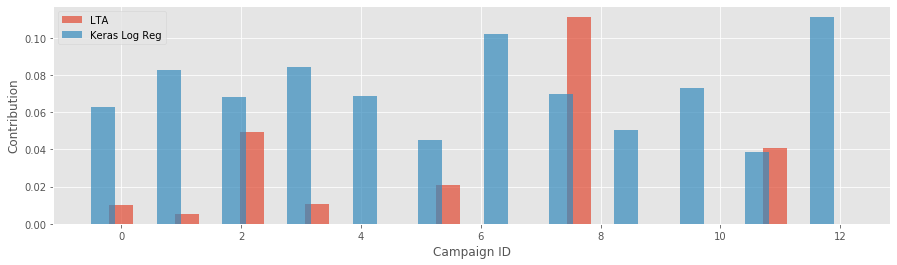

In [129]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

ratio = max(lta[campaign_idx]) / max(keras_logreg[campaign_idx])
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), lta[campaign_idx], width=0.4, alpha=0.7, label='LTA' )
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)) - 0.3, keras_logreg[campaign_idx], width=0.4, alpha=0.7, label='Keras Log Reg' )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()

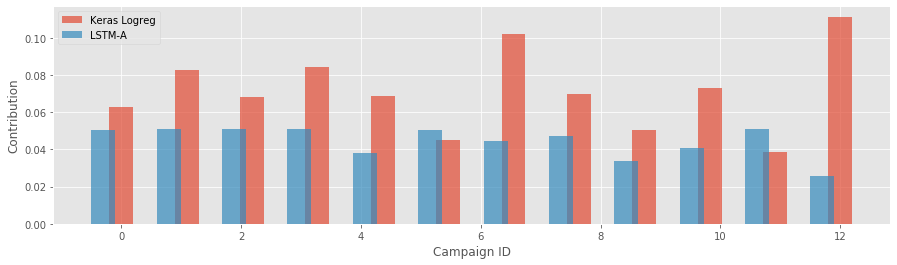

In [135]:
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)

ratio = max(keras_logreg[campaign_idx]) / max(lstm_a[campaign_idx])
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)), keras_logreg[campaign_idx], width=0.4, alpha=0.7, label='Keras Logreg' )
plt.bar(np.linspace(0, len(campaign_idx), len(campaign_idx)) - 0.3, lstm_a[campaign_idx], width=0.4, alpha=0.7, label='LSTM-A'  )
plt.xlabel('Campaign ID')
plt.ylabel('Contribution')
plt.legend(loc='upper left')
plt.show()


# Simulation

In [138]:
# Key assumption: If one of the campaigns in a journey runs out of budget, 
# then the conversion reward is fully lost for the entire journey
# including both past and future campaigns
def get_campaign_id(x_journey_step):
    return np.argmax(x_journey_step[0:n_campaigns])

def simulate_budget_roi(df, budget_total, attribution, verbose=False):
    budgets = np.ceil(attribution * (budget_total / np.sum(attribution)))
    
    if(verbose):
        print(budgets)
    
    blacklist = set()
    conversions = set()
    for i in range(df.shape[0]):
        campaign_id = get_campaign_id(df.loc[i]['CampaignName']) 
        jid = df.loc[i]['jid']
        if jid not in blacklist:
            if budgets[campaign_id] >= 1:
                budgets[campaign_id] = budgets[campaign_id] - 1
                if(df.loc[i]['conversion'] == 1):
                    conversions.add(jid)
            else:
                blacklist.add(jid)
        
        if(verbose):
            if(i % 10000 == 0):
                print('{:.2%} : {:.2%} budget spent'.format(i/df.shape[0], 1.0 - np.sum(budgets)/budget_total ))
        
        if(np.sum(budgets) < budget_total * 0.02):
            break
            
    return len(conversions.difference(blacklist))

In [140]:
pitches = [0.1, 0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
attributions = [lta, keras_logreg, lstm_a]

for i, pitch in enumerate(pitches):
    for j, attribution in enumerate(attributions):
        reward = simulate_budget_roi(df6, 10000, attribution**pitch)
        print('{} {} : {}'.format(i, j, reward))

0 0 : 50
0 1 : 14
0 2 : 17
1 0 : 42
1 1 : 14
1 2 : 18
2 0 : 21
2 1 : 11
2 2 : 23
3 0 : 3
3 1 : 10
3 2 : 30
4 0 : 1
4 1 : 8
4 2 : 34
5 0 : 1
5 1 : 5
5 2 : 37
6 0 : 1
6 1 : 5
6 2 : 40
7 0 : 0
7 1 : 3
7 2 : 41
